In [2]:
from statevectorsim.utils import *
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from statevectorsim import QuantumState, QuantumCircuit, QuantumGate
from statevectorsim import test_suite
from utils import *
from statevectorsim.test_suite import *

In [4]:
try:
    test_single_gates()
    test_rotation_gates()
    test_two_qubit_gates()
    test_controlled_rotation_gates()
    test_multi_controlled_gates()

    print("\nAll Quantum Gate tests passed successfully!")
except AssertionError as e:
    print(f"\nTEST FAILED: {e}")
except Exception as e:
    print(f"\nAn unexpected error occurred during testing: {e}")

--- Testing Single Qubit Gates (X, Y, Z, H, I) ---
Single Qubit Gates: PASS
--- Testing Single Qubit Rotation Gates (Rx, Ry, Rz) ---
Rotation Gates: PASS
--- Testing Two Qubit Gates (CX, CZ, SWAP) ---
Two Qubit Gates: PASS
--- Testing Controlled Rotation Gates (CRx, CRy, CRz) ---
Controlled Rotation Gates: PASS
--- Testing Multi-Controlled Gates (CCX, MCX, MCY, MCZ) ---
Multi-Controlled Gates: PASS

All Quantum Gate tests passed successfully!


Gate: x
   Index State       Amplitude
0      0   |0>  0.0000+0.0000j
1      1   |1>  1.0000+0.0000j
Measure:  [1] 



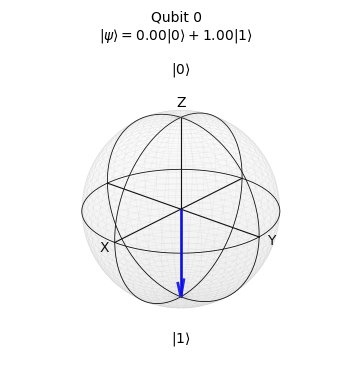

Gate: y
   Index State       Amplitude
0      0   |0>  0.0000+0.0000j
1      1   |1>  0.0000+1.0000j
Measure:  [1] 



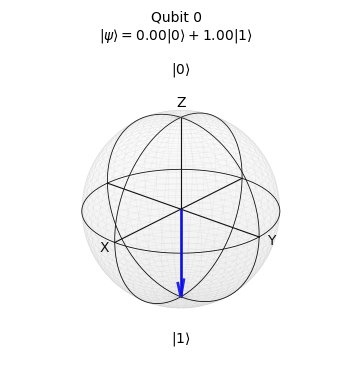

Gate: z
   Index State       Amplitude
0      0   |0>  1.0000+0.0000j
1      1   |1>  0.0000+0.0000j
Measure:  [0] 



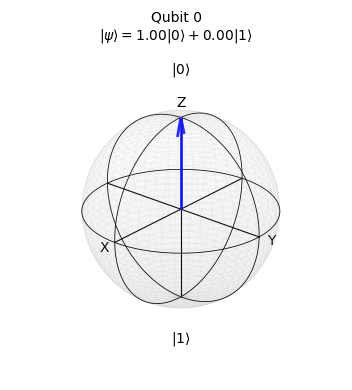

Gate: h
   Index State       Amplitude
0      0   |0>  0.7071+0.0000j
1      1   |1>  0.7071+0.0000j
Measure:  [1] 



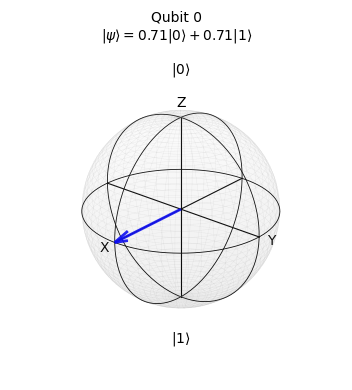

Gate: i
   Index State       Amplitude
0      0   |0>  1.0000+0.0000j
1      1   |1>  0.0000+0.0000j
Measure:  [0] 



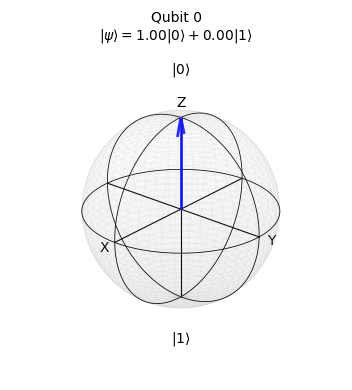

In [5]:
from statevectorsim import QuantumState, QuantumCircuit, QuantumGate
from utils import *

num_qubits = 1

for gate in ['x', 'y', 'z', 'h', 'i']:
    qr = QuantumState(num_qubits)
    qc = QuantumCircuit(num_qubits)

    gate_method = getattr(QuantumGate, gate)
    qc.add_gate(gate_method(0))

    qc.run(qr)
    out = qr.statevector()

    print('Gate:', gate)
    print(statevector_to_dataframe(out))
    print('Measure: ', qr.measure_all(),'\n')
    plot_bloch_spheres(out)


Gate: x, then cx
   Index State       Amplitude
0      0  |00>  0.0000+0.0000j
1      1  |01>  0.0000+0.0000j
2      2  |10>  0.0000+0.0000j
3      3  |11>  1.0000+0.0000j
Measure:  [1, 1] 



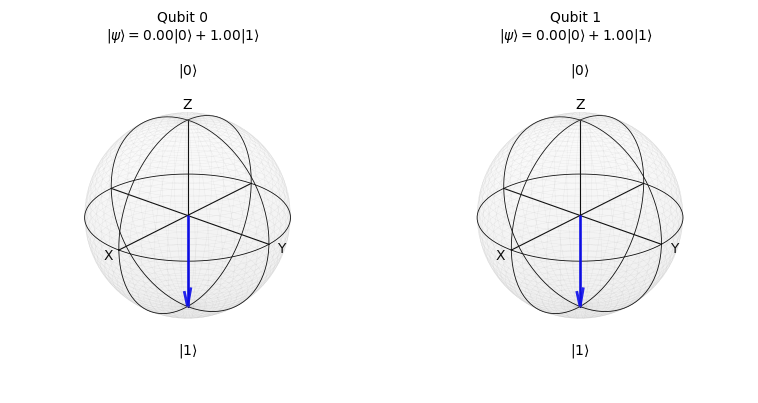

In [6]:
from statevectorsim import QuantumState, QuantumCircuit, QuantumGate
from utils import *

num_qubits = 2

qr = QuantumState(num_qubits)
qc = QuantumCircuit(num_qubits)

qc.add_gate(QuantumGate.x(0))
qc.add_gate(QuantumGate.cx(0, 1))

qc.run(qr)
out = qr.statevector()

print('Gate:', 'x, then cx')
print(statevector_to_dataframe(out))
print('Measure: ', qr.measure_all(),'\n')
plot_bloch_spheres(out)